In [28]:

from resemblyzer import VoiceEncoder, preprocess_wav
import numpy as np
from pathlib import Path
import librosa
import dsp
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt 


samplerate = 16000  # prefer for voice commands / speech recognition
channels = 1

In [25]:
def plot_audio(file_name):
    y, sr = librosa.load(file_name, sr=samplerate, mono=True)
    # before filtering
    data = y
 
 
    # subplot before filtering
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(data)
    plt.title(file_name)
    plt.xlabel('Sample Index (before filtering)')
    plt.ylabel('Amplitude') 

    # after filtering
    # remove first 500 samples to avoid clicks
    filtered_data = y[5000:]
    filtered_data = dsp.clearNoise(filtered_data)
    plt.subplot(1, 2, 2)
    plt.plot(filtered_data)
    plt.title(file_name)
    plt.xlabel('Sample Index (after filtering)')
    plt.ylabel('Amplitude')
    plt.show()
    
    # sd.play(data, samplerate)
    # sd.wait()  
    sd.play(filtered_data, samplerate)
    sd.wait()

 

Loaded the voice encoder model on cpu in 0.02 seconds.
Cosine similarity between the recorded audio and 'open_notepad.wav': 0.4792


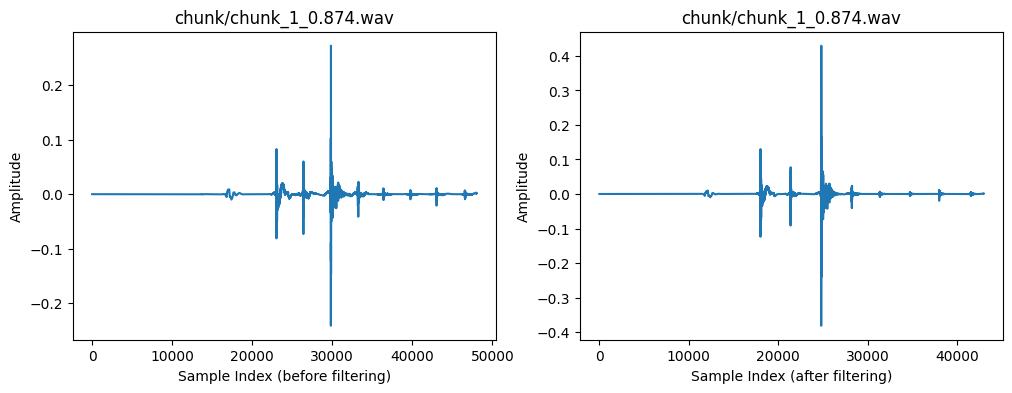

In [43]:
out_file = "chunk/chunk_1_0.874.wav"
y, sr = librosa.load("samplex/open_notepad.wav", sr=samplerate, mono=True)
wav1 = preprocess_wav(y)


encoder = VoiceEncoder()
# Get speaker embeddings
embed1 = encoder.embed_utterance(wav1)

# with sf.SoundFile(out_file, mode='w', samplerate=samplerate, channels=channels, subtype='PCM_16') as file:
#     def callback(indata, frames, time, status):
#         if status:
#             print(status, file=sys.stderr)
#         file.write(indata)
#     with sd.InputStream(samplerate=samplerate, channels=channels, callback=callback):
#         input("Recording... press Enter to stop\n")
# print(f"Saved to {out_file}")
embed2 = encoder.embed_utterance(preprocess_wav(Path(out_file)))
# Compute cosine similarity
similarity = np.dot(embed1, embed2) / (np.linalg.norm(embed1) * np.linalg.norm(embed2))
print(f"Cosine similarity between the recorded audio and 'open_notepad.wav': {similarity:.4f}") 

plot_audio(out_file)


   

In [32]:
# Load and preprocess the audio files
wav1 = preprocess_wav(Path("samplex/open_notepad.wav"))
wav2 = preprocess_wav(Path("sample/voice_2.wav"))


# Initialize the encoder
encoder = VoiceEncoder()

# Get speaker embeddings
embed1 = encoder.embed_utterance(wav1)
embed2 = encoder.embed_utterance(wav2)


# Compute cosine similarity
similarity = np.dot(embed1, embed2) / (np.linalg.norm(embed1) * np.linalg.norm(embed2))

print(f"Similarity Score: {similarity:.4f}")
if similarity > 0.75:
    print("✅ Likely the same speaker.")
else:
    print("❌ Likely different speakers.")


Loaded the voice encoder model on cpu in 0.02 seconds.
Similarity Score: 0.5537
❌ Likely different speakers.


Saved to sample/custom3.wav


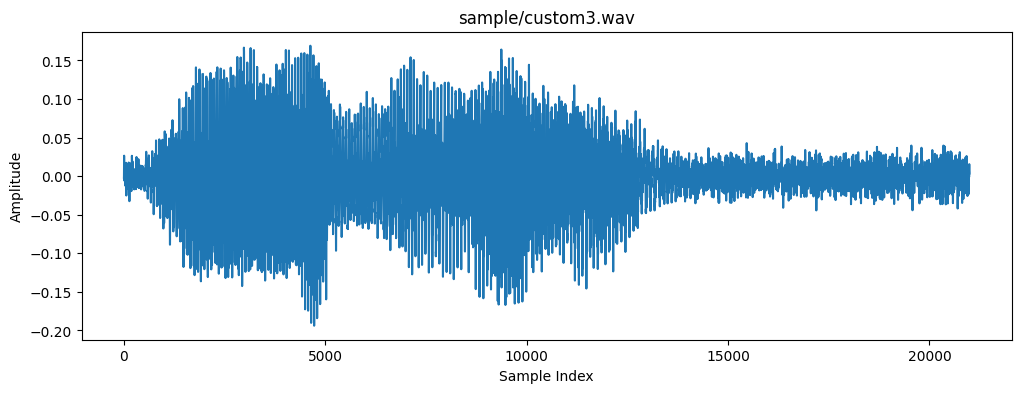

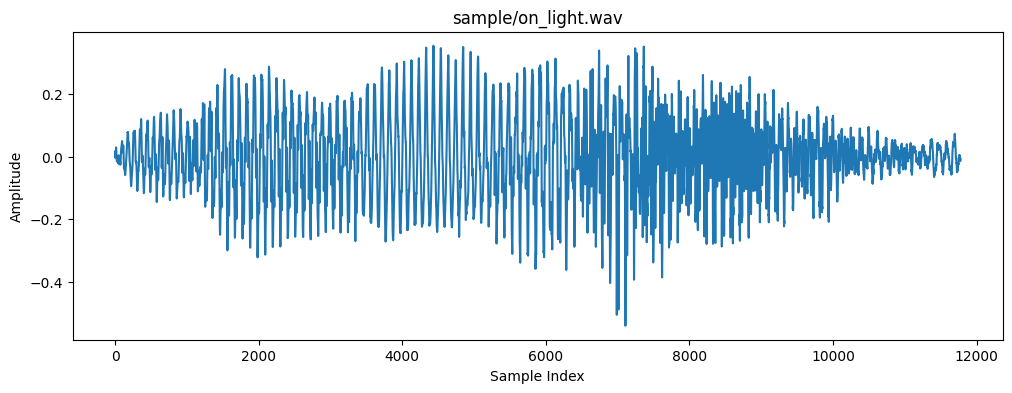

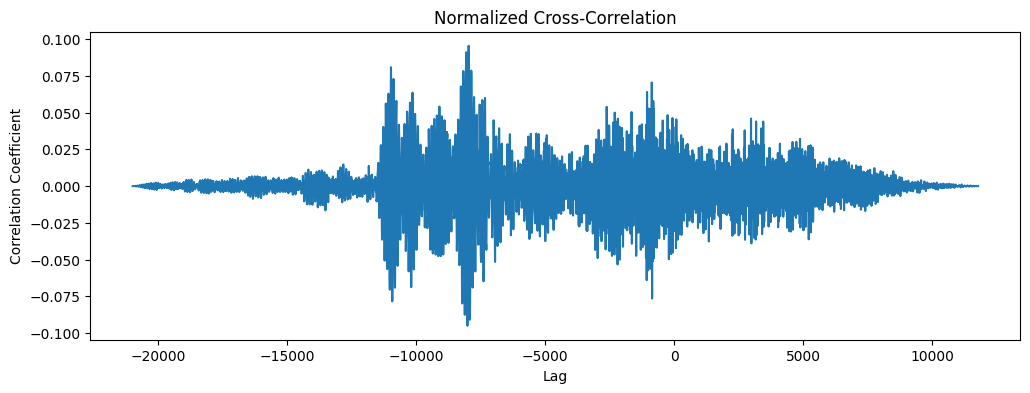

Command didn't match
Rating: 0.09557770018014233, Lag: -7971


In [121]:

out_file = "sample/custom3.wav"

# with sf.SoundFile(out_file, mode='w', samplerate=samplerate, channels=channels, subtype='PCM_16') as file:
#     def callback(indata, frames, time, status):
#         if status:
#             print(status, file=sys.stderr)
#         file.write(indata)
#     with sd.InputStream(samplerate=samplerate, channels=channels, callback=callback):
#         input("Recording... press Enter to stop\n")
print(f"Saved to {out_file}")
cal2 = plot_audio(out_file,15,80,False)


out_file = "sample/on_light.wav"
cal1 = plot_audio(out_file,15, 80, False) 

corr = max_normalized_cross_correlation(cal1[0], cal2[0])

rating = corr[0]
lag = corr[1]
if(rating > 0.6) and (abs(lag) < 3000):
    print("Command Matched")
    print(f"Rating: {rating}, Lag: {lag}")
else:
    print("Command didn't match")
    print(f"Rating: {rating}, Lag: {lag}")
 